# Question 1  
Introduction:  
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.  
Occupations  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called users  
Step 4. Discover what is the mean age per occupation  
Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
Step 6. For each occupation, calculate the minimum and maximum ages  
Step 7. For each combination of occupation and sex, calculate the mean age   
Step 8. For each occupation present the percentage of women and men  


In [3]:
#Step 1. Import the necessary libraries  

import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#Step 3. Assign it to a variable called users
users = pd.read_csv(url, sep='|', index_col='user_id')   

# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("**Mean Age per Occupation:**")
print(mean_age_per_occupation.to_markdown())
print("\n")

# Step 5: Discover the Male ratio per occupation and sort it
def male_ratio(group):
    return (group == 'M').sum() / group.count()

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(male_ratio)
sorted_male_ratio = male_ratio_per_occupation.sort_values(ascending=False)
print("**Male Ratio per Occupation (Sorted):**")
print(sorted_male_ratio.to_markdown())
print("\n")

# Step 6: Calculate the minimum and maximum ages per occupation
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("**Age Range per Occupation:**")
print(age_range_per_occupation.to_markdown())
print("\n")

# Step 7: Calculate the mean age per combination of occupation and sex
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
print("**Mean Age per Occupation and Gender:**")
print(mean_age_per_combination.to_markdown())
print("\n")

# Step 8: Calculate the percentage of women and men per occupation
def gender_percentage(group):
    total_count = group.count()
    women_count = (group == 'F').sum()
    men_count = total_count - women_count
    women_percentage = (women_count / total_count) * 100
    men_percentage = (men_count / total_count) * 100
    return pd.Series({'Women %': women_percentage, 'Men %': men_percentage})

gender_percentage_per_occupation = users.groupby('occupation')['gender'].apply(gender_percentage)
gender_percentage_per_occupation = gender_percentage_per_occupation.reset_index()  # Reset the index for formatting

print("**Gender Percentage per Occupation:**")
print(gender_percentage_per_occupation.to_markdown(index=False))  # Exclude the index column from display


**Mean Age per Occupation:**
| occupation    |     age |
|:--------------|--------:|
| administrator | 38.7468 |
| artist        | 31.3929 |
| doctor        | 43.5714 |
| educator      | 42.0105 |
| engineer      | 36.3881 |
| entertainment | 29.2222 |
| executive     | 38.7188 |
| healthcare    | 41.5625 |
| homemaker     | 32.5714 |
| lawyer        | 36.75   |
| librarian     | 40      |
| marketing     | 37.6154 |
| none          | 26.5556 |
| other         | 34.5238 |
| programmer    | 33.1212 |
| retired       | 63.0714 |
| salesman      | 35.6667 |
| scientist     | 35.5484 |
| student       | 22.0816 |
| technician    | 33.1481 |
| writer        | 36.3111 |


**Male Ratio per Occupation (Sorted):**
| occupation    |   gender |
|:--------------|---------:|
| doctor        | 1        |
| engineer      | 0.970149 |
| technician    | 0.962963 |
| retired       | 0.928571 |
| programmer    | 0.909091 |
| executive     | 0.90625  |
| scientist     | 0.903226 |
| entertainment | 0.8888

# Question 2  
Euro Teams  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address  
Step 3. Assign it to a variable called euro12  
Step 4. Select only the Goal column  
Step 5. How many team participated in the Euro2012?  
Step 6. What is the number of columns in the dataset?  
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline  
Step 8. Sort the teams by Red Cards, then to Yellow Cards  
Step 9. Calculate the mean Yellow Cards given per Team  
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G  
Step 12. Select the first 7 columns  
Step 13. Select all columns except the last 3  
Step 14. Present only the Shooting Accuracy from England, Italy and Russia  


In [4]:
#Step 1. Import the necessary libraries 

import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

#Step 3. Assign it to a variable called euro12  
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals = euro12['Goals']
print("**Goals column:**")
print(goals.to_markdown())
print("\n")

# Step 5: How many teams participated in Euro2012?
num_teams = euro12['Team'].nunique()
print("**Number of teams participated in Euro2012:**", num_teams)
print("\n")

# Step 6: Number of columns in the dataset
num_columns = euro12.shape[1]
print("**Number of columns in the dataset:**", num_columns)
print("\n")

# Step 7: View only the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("**Discipline dataframe:**")
print(discipline.to_markdown())
print("\n")

# Step 8: Sort the teams by Red Cards, then Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("**Sorted discipline dataframe:**")
print(sorted_discipline.to_markdown())
print("\n")

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean().reset_index()
print("**Mean Yellow Cards per Team:**")
print(mean_yellow_cards_per_team.to_markdown(index=False))
print("\n")

# Step 10: Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print("**Teams that scored more than 6 goals:**")
print(high_scoring_teams.to_markdown(index=False))
print("\n")

# Step 11: Select teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]['Team']
print("**Teams starting with G:**")
print(teams_starting_with_G.to_markdown(index=False))
print("\n")

# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("**First 7 columns:**")
print(first_7_columns.to_markdown())
print("\n")

# Step 13: Select all columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]
print("**All columns except the last 3:**")
print(all_columns_except_last_3.to_markdown())
print("\n")

# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(selected_teams)][['Team', 'Shooting Accuracy']]
print("**Shooting Accuracy for England, Italy, and Russia:**")
print(shooting_accuracy_selected_teams.to_markdown())
print("\n")


**Goals column:**
|    |   Goals |
|---:|--------:|
|  0 |       4 |
|  1 |       4 |
|  2 |       4 |
|  3 |       5 |
|  4 |       3 |
|  5 |      10 |
|  6 |       5 |
|  7 |       6 |
|  8 |       2 |
|  9 |       2 |
| 10 |       6 |
| 11 |       1 |
| 12 |       5 |
| 13 |      12 |
| 14 |       5 |
| 15 |       2 |


**Number of teams participated in Euro2012:** 16


**Number of columns in the dataset:** 35


**Discipline dataframe:**
|    | Team                |   Yellow Cards |   Red Cards |
|---:|:--------------------|---------------:|------------:|
|  0 | Croatia             |              9 |           0 |
|  1 | Czech Republic      |              7 |           0 |
|  2 | Denmark             |              4 |           0 |
|  3 | England             |              5 |           0 |
|  4 | France              |              6 |           0 |
|  5 | Germany             |              4 |           0 |
|  6 | Greece              |              9 |           1 |
|  7 | Italy  

# Question 3  
Housing  
Step 1. Import the necessary libraries  
Step 2. Create 3 differents Series, each of length 100, as follows:  
• The first a random number from 1 to 4  
• The second a random number from 1 to 3  
• The third a random number from 10,000 to 30,000  
Step 3. Create a DataFrame by joinning the Series by column  
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter  
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'  
Step 6. Ops it seems it is going only until index 99. Is it true?  
Step 7. Reindex the DataFrame so it goes from 0 to 299  


In [5]:
#Step 1. Import the necessary libraries  
import pandas as pd
import numpy as np
from tabulate import tabulate

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Create a DataFrame by joining the Series by column
data = pd.concat([series1, series2, series3], axis=1)
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 4: Change the name of the columns
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

# Step 6: Check if the DataFrame goes only until index 99
print("Does the DataFrame go only until index 99?", bigcolumn.index.max() == 99)
print("\n")

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))

# Printing the DataFrames using tabulate
print("Data DataFrame:")
print(tabulate(data, headers='keys', tablefmt='grid'))
print("\n")

print("Bigcolumn DataFrame:")
print(tabulate(bigcolumn.to_frame(), headers='keys', tablefmt='grid'))


Does the DataFrame go only until index 99? False


Data DataFrame:
+----+---------+----------+-------------------+
|    |   bedrs |   bathrs |   price_sqr_meter |
+====+=========+==========+===================+
|  0 |       2 |        2 |             25772 |
+----+---------+----------+-------------------+
|  1 |       1 |        2 |             27847 |
+----+---------+----------+-------------------+
|  2 |       2 |        2 |             25022 |
+----+---------+----------+-------------------+
|  3 |       4 |        2 |             19924 |
+----+---------+----------+-------------------+
|  4 |       1 |        1 |             10547 |
+----+---------+----------+-------------------+
|  5 |       2 |        2 |             24577 |
+----+---------+----------+-------------------+
|  6 |       2 |        3 |             27273 |
+----+---------+----------+-------------------+
|  7 |       3 |        2 |             14346 |
+----+---------+----------+-------------------+
|  8 |       3 |     

# Question 4  
Wind Statistics  
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:  
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67    11.50 10.04 9.79 9.67 17.54 13.83  
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71  
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries  
Step 2. Import the dataset from the attached file wind.txt  
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.  
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.  
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].  
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.  
Step 7. Compute how many non-missing values there are in total.  
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.  
A single number for the entire dataset.  
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.  
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.  
A different set of numbers for each day.  
Step 11. Find the average windspeed in January for each location.  
Treat January 1961 and January 1962 both as January.  
Step 12. Downsample the record to a yearly frequency for each location.  
Step 13. Downsample the record to a monthly frequency for each location.  
Step 14. Downsample the record to a weekly frequency for each location.  
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.  



In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Load the data from the file
data = pd.read_csv("wind.txt", sep=" ")
print(data)

# Rename columns
data = data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})


      Yr    Mo    Dy  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7  \
0     61   NaN   1.0         NaN        1.00  15.04       14.96       13.17   
1     61   NaN   1.0         NaN        2.00  14.71         NaN         NaN   
2     61   NaN   1.0         NaN        3.00  18.50       16.88       12.33   
3     61   NaN   1.0         NaN        4.00  10.58         NaN        6.63   
4     61   NaN   1.0         NaN        5.00  13.33       13.25       11.42   
...   ..   ...   ...         ...         ...    ...         ...         ...   
6569  78  12.0  27.0       17.58       16.96  17.62         NaN        8.08   
6570  78  12.0  28.0       13.21         NaN   5.46       13.46         NaN   
6571  78  12.0  29.0       14.00       10.29  14.42         NaN        8.71   
6572  78  12.0  30.0       18.50       14.04  21.29         NaN        9.13   
6573  78  12.0  31.0       20.33       17.41  27.29         NaN        9.59   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unn

In [2]:
import pandas as pd

# Read the dataset
data = pd.read_csv("wind.txt", sep=" ")

# Function to fix year values
def fix_year(year):
    if year >= 90:
        return 1900 + year
    else:
        return 2000 + year

# Apply the function to the 'Yr' column
data['Yr'] = data['Yr'].apply(fix_year)

# Rename columns
data = data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})

# Create a new 'date' column by combining year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Display the first few rows of the dataset
print(data.head())

# Count missing values for each location
missing_values_per_location = data.isnull().sum()

# Display the missing values count
print("**Missing Values Count Per Location:**")
print(missing_values_per_location)

# Count non-missing values in the entire dataset
total_non_missing_values = data.notnull().sum().sum()

# Display the total number of non-missing values
print("**Total Number of Non-Missing Values:**", total_non_missing_values)

# Calculate the mean windspeed over all locations and times
mean_windspeed = data.mean().mean()

# Display the mean windspeed
print("**Mean Windspeed Over All Locations and Times:**", mean_windspeed)

# Calculate statistics for each location
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

# Display the loc_stats DataFrame
print("**Statistics for Windspeed at Each Location:**")
print(loc_stats)

# Calculate statistics for each day
day_stats = data.resample('D').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

# Display the day_stats DataFrame
print("**Statistics for Windspeed Across All Locations Each Day:**")
print(day_stats)

# Downsample to yearly frequency for each location
yearly_data = data.resample('Y').mean()

# Display the yearly_data DataFrame
print("**Yearly Downsampled Data for Each Location:**")
print(yearly_data)

# Downsample to monthly frequency for each location
monthly_data = data.resample('M').mean()

# Display the monthly_data DataFrame
print("**Monthly Downsampled Data for Each Location:**")
print(monthly_data)

# Downsample to weekly frequency for each location
weekly_data = data.resample('W').mean()

# Display the weekly_data DataFrame
print("**Weekly Downsampled Data for Each Location:**")
print(weekly_data)

# Downsample to weekly frequency and calculate statistics
weekly_stats = data.resample('W').agg({
    'RPT': ['min', 'max', 'mean', 'std'],
    'VAL': ['min', 'max', 'mean', 'std'],
    'ROS': ['min', 'max', 'mean', 'std'],
    'KIL': ['min', 'max', 'mean', 'std'],
    'SHA': ['min', 'max', 'mean', 'std'],
    'BIR': ['min', 'max', 'mean', 'std'],
    'DUB': ['min', 'max', 'mean', 'std'],
    'CLA': ['min', 'max', 'mean', 'std'],
    'MUL': ['min', 'max', 'mean', 'std'],
    'CLO': ['min', 'max', 'mean', 'std'],
    'BEL': ['min', 'max', 'mean', 'std'],
    'MAL': ['min', 'max', 'mean', 'std']
})

# Display the weekly_stats DataFrame
print("**Weekly Statistics for Windspeed Across All Locations:**")
print(weekly_stats)


      year  month  day  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7  \
date                                                                            
NaT   2061    NaN  1.0         NaN         1.0  15.04       14.96       13.17   
NaT   2061    NaN  1.0         NaN         2.0  14.71         NaN         NaN   
NaT   2061    NaN  1.0         NaN         3.0  18.50       16.88       12.33   
NaT   2061    NaN  1.0         NaN         4.0  10.58         NaN        6.63   
NaT   2061    NaN  1.0         NaN         5.0  13.33       13.25       11.42   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unnamed: 31  CLO  Unnamed: 33  \
date                     ...                                                    
NaT     NaN        9.29  ...  NaN          NaN          NaN  NaN          NaN   
NaT     NaN       10.83  ...  NaN          NaN          NaN  NaN          NaN   
NaT   10.13       11.17  ...  NaN          NaN          NaN  NaN          NaN   
NaT   11.75         NaN  ..

# Question - 5

Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries  
Step 5. What is the number of observations in the dataset?  
Step 6. What is the number of columns in the dataset?  
Step 7. Print the name of all the columns.  
Step 8. How is the dataset indexed?  
Step 9. Which was the most-ordered item?  
Step 10. For the most-ordered item, how many items were ordered?  
Step 11. What was the most ordered item in the choice_description column? Step 12. How many items were orderd in total?  
Step 13.  
• Turn the item price into a float  
• Check the item price type  
• Create a lambda function and change the type of item price  
• Check the item price type   
Step 14. How much was the revenue for the period in the dataset?   
Step 15. How many orders were made in the period?  
Step 16. What is the average revenue amount per order?  
Step 17. How many different items are sold?  


In [6]:
#Step 1. Import the necessary libraries  
import pandas as pd1
from tabulate import tabulate

# Step 2. Import the dataset from this address.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("**Step 4: First 10 entries**")
print(tabulate(chipo.head(10), headers='keys', tablefmt='grid'))
print("\n")

# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("**Step 5: Number of observations in the dataset:**", num_observations)
print("\n")

# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("**Step 6: Number of columns in the dataset:**", num_columns)
print("\n")

# Step 7: Print the name of all the columns
print("**Step 7: Column names:**")
print(tabulate(pd.DataFrame(chipo.columns, columns=['Column Name']), headers='keys', tablefmt='grid'))
print("\n")

# Step 8: How is the dataset indexed?
print("**Step 8: Dataset indexing:**")
index_sample = chipo.index[:10]  # Get the first 10 indices
print(tabulate(pd.DataFrame(index_sample, columns=['Index']), headers='keys', tablefmt='grid'))
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("\n")

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("**Step 9: Most-ordered item:**", most_ordered_item)
print("\n")

# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("**Step 10: Number of items ordered for the most-ordered item:**", most_ordered_item_count)
print("\n")

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("**Step 11: Most ordered item in the choice_description column:**", most_ordered_choice)
print("\n")

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("**Step 12: Total number of items ordered:**", total_items_ordered)
print("\n")

# Step 13.1: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Checking item price type
print("**Step 13.2: Item price type after conversion:**")
print(chipo['item_price'].dtype)
print("\n")

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("**Step 14: Total revenue for the period:**", revenue)
print("\n")

# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("**Step 15: Number of orders made in the period:**", num_orders)
print("\n")

# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print("**Step 16: Average revenue amount per order:**", average_revenue_per_order)
print("\n")

# Step 17: How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("**Step 17: Number of different items sold:**", num_different_items)
print("\n")


**Step 4: First 10 entries**
+----+------------+------------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------+
|    |   order_id |   quantity | item_name                             | choice_description                                                                                                 | item_price   |
+====+============+============+=======================================+====================================================================================================================+==============+
|  0 |          1 |          1 | Chips and Fresh Tomato Salsa          | nan                                                                                                                | $2.39        |
+----+------------+------------+---------------------------------------+-------------------------------------------------------------------------------

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.  
Don't forget to label your axes!


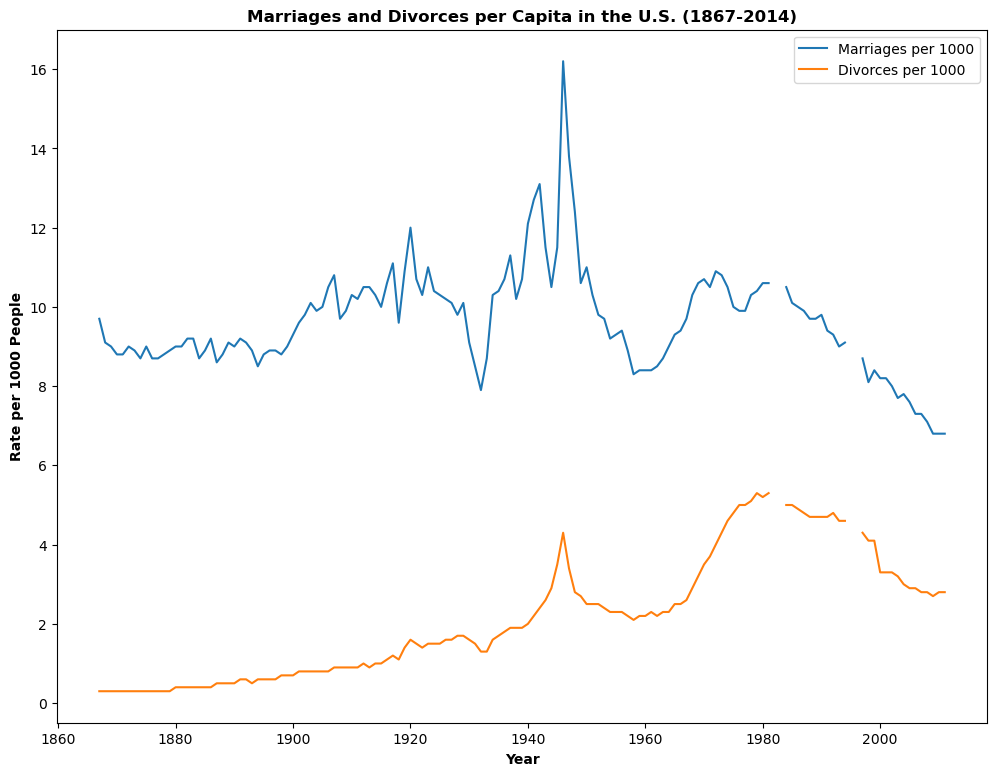

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the given path
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Create a line plot
plt.figure(figsize=(12, 9))  # Set the figure size

# Plot the data
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

# Set labels and title
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Rate per 1000 People',fontweight='bold')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)',fontweight='bold')

# Add legend
plt.legend()

# Display the plot
plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

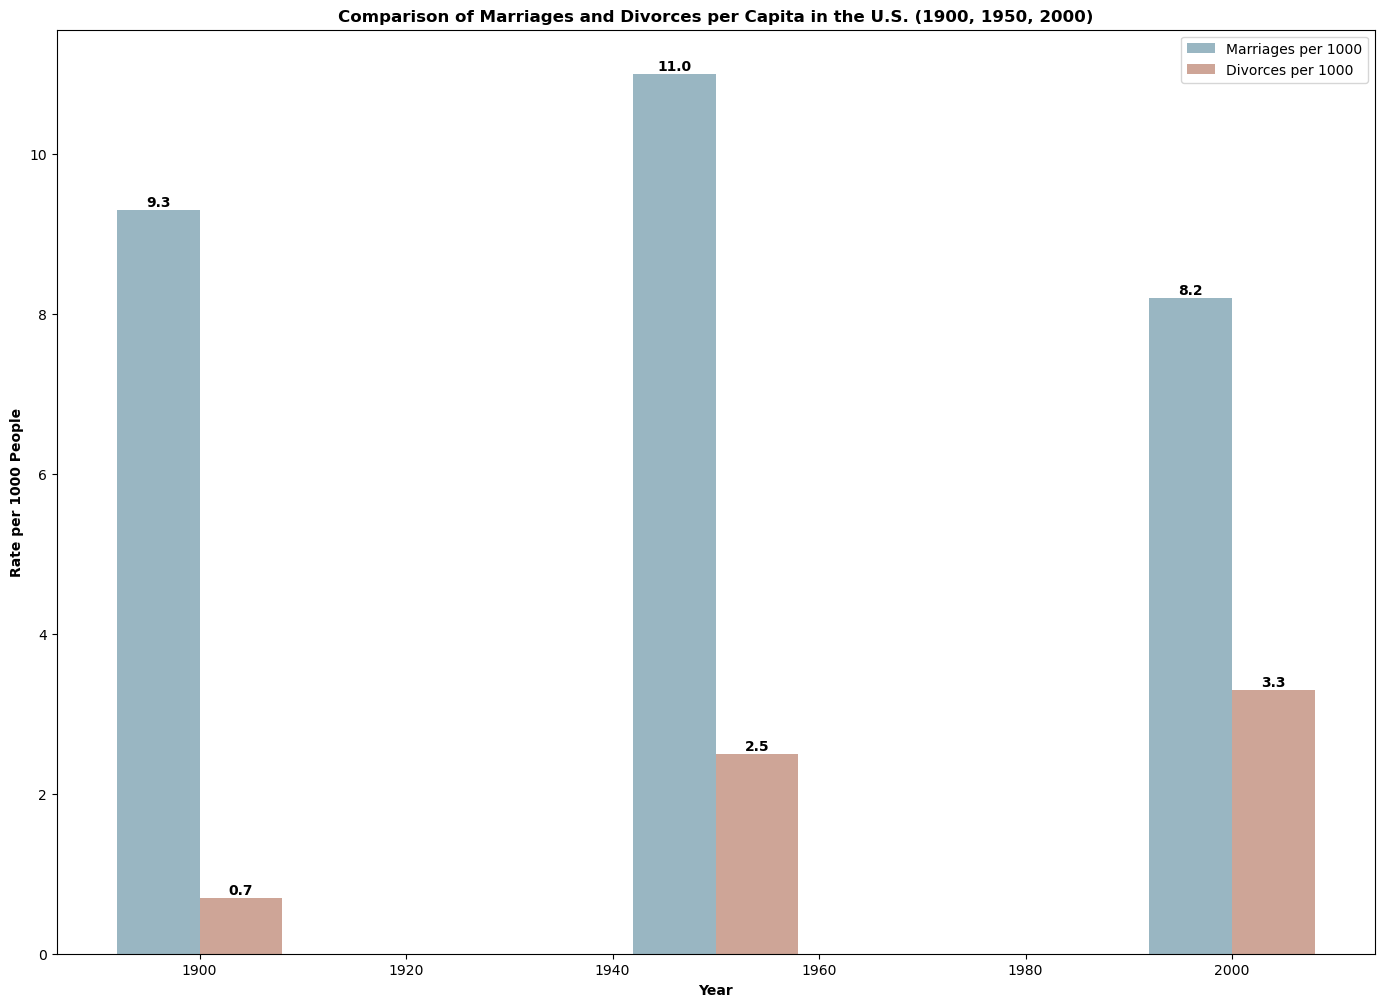

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Filtering data for the years 1900, 1950, and 2000
years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

# Creating a vertical bar chart with custom styles
plt.figure(figsize=(17, 12))  # Increase the figure size

# Setting the width of the bars
bar_width = 8.0

# Choose a more subdued color palette
color_palette = ['#6E98A8', '#BA7F6B']  # Soft blue and muted orange

# Plotting the data with modified colors
marriages_bars = plt.bar(filtered_data['Year'] - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', alpha=0.7, color=color_palette[0])
divorces_bars = plt.bar(filtered_data['Year'] + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', alpha=0.7, color=color_palette[1])

# Setting labels and title with formatting
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Rate per 1000 People', fontweight='bold')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontweight='bold')

# Adding legend
plt.legend()

# Adding numbers on top of the bars
for bar in marriages_bars + divorces_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Displaying the plot
plt.show()


# Question 8
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.  
Don't forget to label your axes!  

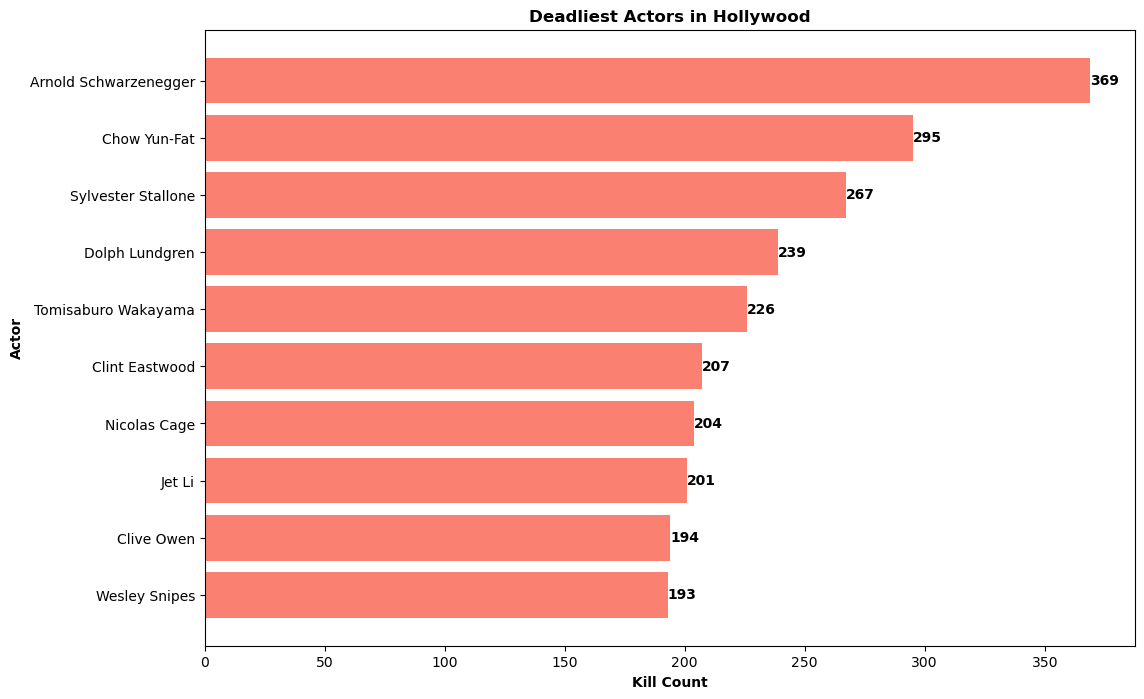

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort the data by kill count
sorted_data = data.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))  # Set the figure size

# Choose a different color for the bars
bar_color = 'salmon'

# Plot the data with modified color
plt.barh(sorted_data['Actor'], sorted_data['Count'], color=bar_color)

# Set labels and title
plt.xlabel('Kill Count', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Deadliest Actors in Hollywood', fontweight='bold')

# Add actor names as labels to the bars
for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontweight='bold')

# Display the plot
plt.show()



# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.  
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.  


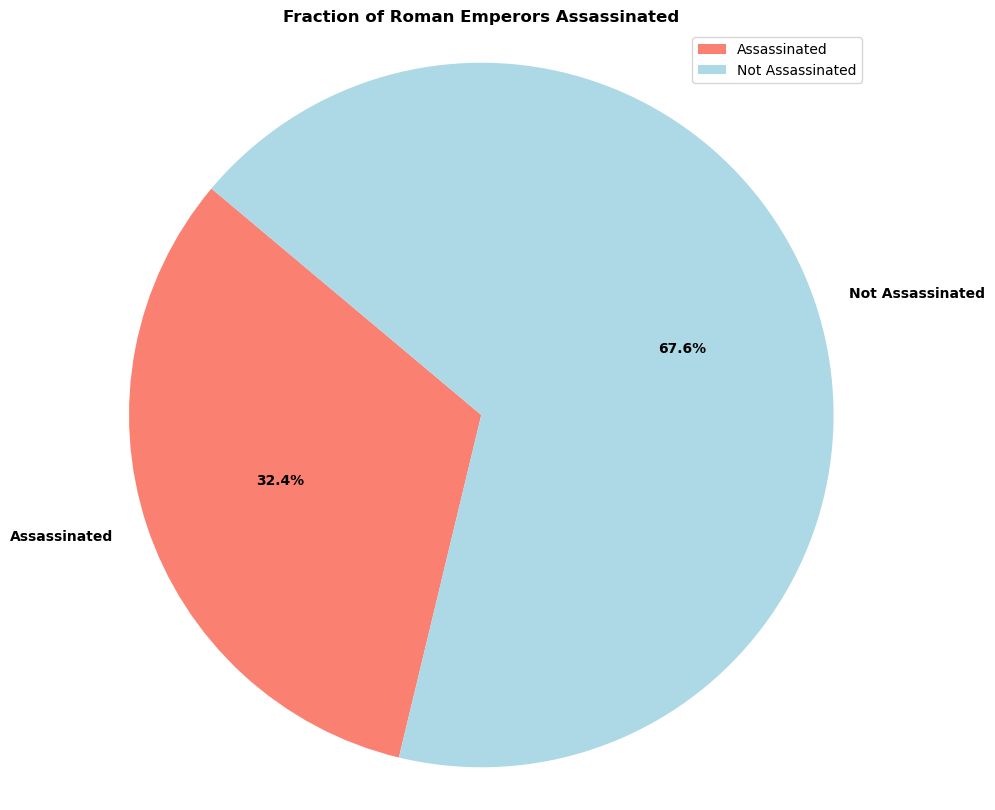

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Calculate the number of emperors assassinated
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
assassinated_count = len(assassinated_emperors)

# Calculate the percentage of emperors assassinated
percentage_assassinated = (assassinated_count / total_emperors) * 100

# Create a pie chart
plt.figure(figsize=(10, 10))  # Set the figure size

# Choose a suitable color palette
colors = ['salmon', 'lightblue']

# Plot the pie chart with bold labels and legends
plt.pie([assassinated_count, total_emperors - assassinated_count], labels=['Assassinated', 'Not Assassinated'],
        colors=colors, autopct='%1.1f%%', startangle=140, textprops={'weight': 'bold'})

# Set the aspect ratio to be equal, so the pie chart is a circle
plt.axis('equal')

# Set the title
plt.title('Fraction of Roman Emperors Assassinated', fontweight='bold')

# Add legends
plt.legend()

# Display the pie chart
plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.  
Don't forget to label your axes! Color each dot according to its year.
BDAT 1004 

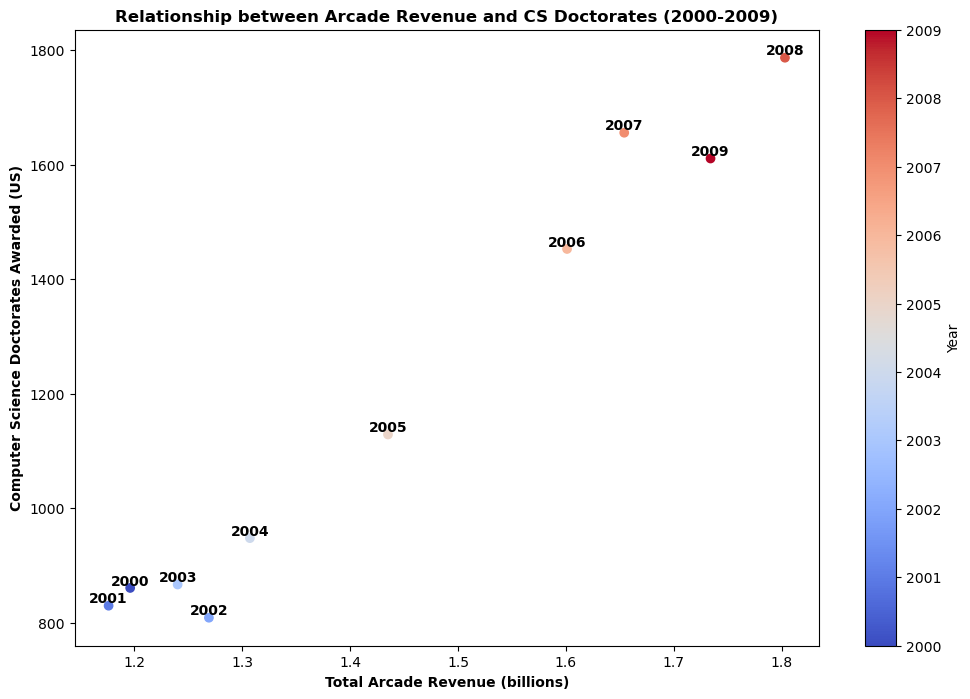

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Set the figure size

# Choose a suitable color map
color_map = 'coolwarm'

# Plot the data points with color-coded years using the chosen color map
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'], cmap=color_map)

# Set labels and title with bold formatting
plt.xlabel('Total Arcade Revenue (billions)', fontweight='bold')
plt.ylabel('Computer Science Doctorates Awarded (US)', fontweight='bold')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)', fontweight='bold')

# Add year as text to each data point
for i, year in enumerate(data['Year']):
    plt.text(data['Total Arcade Revenue (billions)'][i], data['Computer Science Doctorates Awarded (US)'][i], str(year),
             fontsize=10, ha='center', va='bottom', fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Display the plot
plt.show()

